In [19]:
import os
import random
import shutil

In [21]:
original_dir = "/home/admin1/Downloads/EN23107131/COVID-19_Radiography_Dataset"
small_dir = "/home/admin1/Downloads/EN23107131/covid_19"

os.makedirs(small_dir, exist_ok=True)

In [23]:
limit = 1000  # images per class

os.makedirs(small_dir, exist_ok=True)

for class_name in os.listdir(original_dir):
    class_path = os.path.join(original_dir, class_name)

    if os.path.isdir(class_path):
        images_dir = os.path.join(class_path, "images")

        if not os.path.exists(images_dir):
            continue

        images = os.listdir(images_dir)
        random.shuffle(images)

        target_class_dir = os.path.join(small_dir, class_name)
        os.makedirs(target_class_dir, exist_ok=True)

        for img in images[:limit]:
            src = os.path.join(images_dir, img)
            dst = os.path.join(target_class_dir, img)
            shutil.copy(src, dst)

print("✅ Smaller dataset created successfully!")


✅ Smaller dataset created successfully!


In [27]:
import os

small_dir = "/home/admin1/Downloads/EN23107131/covid_19"

for cls in os.listdir(small_dir):
    print(cls, ":", len(os.listdir(os.path.join(small_dir, cls))))

Normal : 1000
COVID : 1000
Lung_Opacity : 1000
Viral Pneumonia : 1000


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "/home/admin1/Downloads/EN23107131/covid_19",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "/home/admin1/Downloads/EN23107131/covid_19",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [31]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

/home/admin1/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 604ms/step - accuracy: 0.4547 - loss: 1.1972 - val_accuracy: 0.6225 - val_loss: 0.8908
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 575ms/step - accuracy: 0.6146 - loss: 0.9141 - val_accuracy: 0.6712 - val_loss: 0.8329
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 617ms/step - accuracy: 0.6348 - loss: 0.8687 - val_accuracy: 0.6800 - val_loss: 0.7977
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 580ms/step - accuracy: 0.6716 - loss: 0.8248 - val_accuracy: 0.6900 - val_loss: 0.7370
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 586ms/step - accuracy: 0.6628 - loss: 0.7940 - val_accuracy: 0.6862 - val_loss: 0.7512
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 585ms/step - accuracy: 0.7020 - loss: 0.7537 - val_accuracy: 0.7050 - val_loss: 0.7760
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 609ms/step - accuracy: 0.7014 - loss: 0.7408 - val_accuracy: 0.7450 - val_loss: 0.6692
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.7152 - loss: 0

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,508,430 (127.82 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,954 (85.22 MB)

In [35]:
train_loss, train_acc = model.evaluate(train_data)
val_loss, val_acc = model.evaluate(val_data)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.7591 - loss: 0.5796
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.7534 - loss: 0.5919
Training Accuracy: 0.7734
Training Loss: 0.5698
Validation Accuracy: 0.7513
Validation Loss: 0.6286


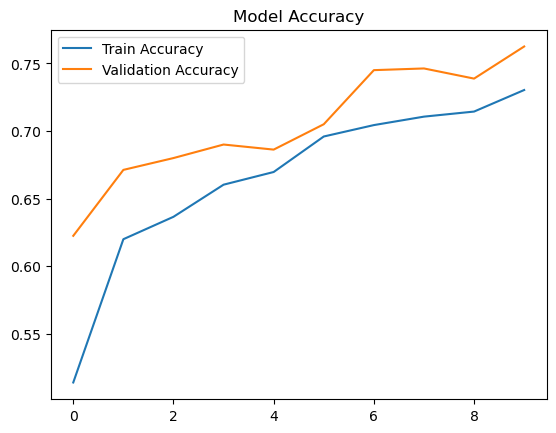

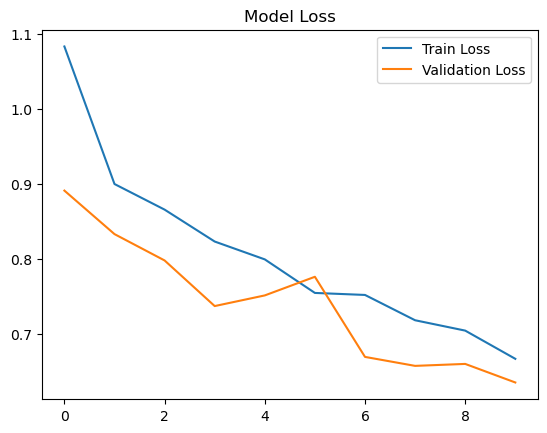

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()